In [3]:
import pandas as pd

Audit_risk = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/training_set_label.csv" )

In [4]:
print(Audit_risk.isnull().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64


In [6]:
Audit_risk.shape

(543, 27)

In [7]:
Audit_risk.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value       False
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [8]:
len(Audit_risk) - Audit_risk.count()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [9]:
Audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.0,543.000000,543.000000
mean,20.464236,2.142874,0.346593,1.162339,9.480252,0.316022,5.538131,11.615851,5.069982,0.223941,1.155617,12.441131,0.288398,7.237898,2.500921,0.205525,0.519337,0.086556,0.212891,0.044199,2.699448,15.663949,0.563536,0.5,5.054067,0.392265
std,24.441277,4.200770,0.173158,2.558306,22.445359,0.171442,13.509523,24.721307,0.281144,0.081145,0.549035,59.090138,0.156512,35.485800,1.214723,0.034986,0.302349,0.534651,0.058735,0.309682,0.853460,43.195795,0.444976,0.0,13.394958,0.488705
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.255000,0.200000,0.051000,0.000000,0.200000,0.000000,0.590000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.582000,0.400000,0.5,0.316400,0.000000
50%,3.890000,0.840000,0.200000,0.168000,0.460000,0.200000,0.092000,1.370000,5.000000,0.200000,1.000000,0.100000,0.200000,0.020000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.556000,0.000000
75%,55.570000,2.400000,0.600000,1.440000,4.500000,0.400000,2.184000,7.660000,5.000000,0.200000,1.000000,5.455000,0.400000,2.182000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,9.959000,0.400000,0.5,3.032800,1.000000
max,59.850000,57.030000,0.600000,34.218000,144.390000,0.600000,86.634000,191.360000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,622.838000,5.800000,0.5,149.817600,1.000000


In [14]:
Audit_risk['Money_Value'] = Audit_risk['Money_Value'].fillna(Audit_risk['Money_Value'].median())

In [15]:
Audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.0,543.000000,543.000000
mean,20.464236,2.142874,0.346593,1.162339,9.480252,0.316022,5.538131,11.615851,5.069982,0.223941,1.155617,12.441131,0.288398,7.237898,2.500921,0.205525,0.519337,0.086556,0.212891,0.044199,2.699448,15.663949,0.563536,0.5,5.054067,0.392265
std,24.441277,4.200770,0.173158,2.558306,22.445359,0.171442,13.509523,24.721307,0.281144,0.081145,0.549035,59.090138,0.156512,35.485800,1.214723,0.034986,0.302349,0.534651,0.058735,0.309682,0.853460,43.195795,0.444976,0.0,13.394958,0.488705
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.255000,0.200000,0.051000,0.000000,0.200000,0.000000,0.590000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.582000,0.400000,0.5,0.316400,0.000000
50%,3.890000,0.840000,0.200000,0.168000,0.460000,0.200000,0.092000,1.370000,5.000000,0.200000,1.000000,0.100000,0.200000,0.020000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.556000,0.000000
75%,55.570000,2.400000,0.600000,1.440000,4.500000,0.400000,2.184000,7.660000,5.000000,0.200000,1.000000,5.455000,0.400000,2.182000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,9.959000,0.400000,0.5,3.032800,1.000000
max,59.850000,57.030000,0.600000,34.218000,144.390000,0.600000,86.634000,191.360000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,622.838000,5.800000,0.5,149.817600,1.000000


In [16]:
Audit_risk = Audit_risk.drop(['Detection_Risk', 'Risk_F'], axis = 1) 
Audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   543 non-null    float64
 1   LOCATION_ID    543 non-null    object 
 2   PARA_A         543 non-null    float64
 3   Score_A        543 non-null    float64
 4   Risk_A         543 non-null    float64
 5   PARA_B         543 non-null    float64
 6   Score_B        543 non-null    float64
 7   Risk_B         543 non-null    float64
 8   TOTAL          543 non-null    float64
 9   numbers        543 non-null    float64
 10  Score_B.1      543 non-null    float64
 11  Risk_C         543 non-null    float64
 12  Money_Value    543 non-null    float64
 13  Score_MV       543 non-null    float64
 14  Risk_D         543 non-null    float64
 15  District_Loss  543 non-null    int64  
 16  PROB           543 non-null    float64
 17  RiSk_E         543 non-null    float64
 18  History   

In [17]:
Audit_risk["LOCATION_ID"].unique()

array(['8', '13', '19', '21', '4', '9', '15', '40', '16', '5', '12', '3',
       '18', '6', '11', '43', '27', '2', '29', '30', '31', '32', '14',
       '1', '36', '20', '39', '28', '7', '38', '41', '25', '44', '37',
       '22', '35', 'NUH', '23', '34', 'SAFIDON', '17', '33'], dtype=object)

In [18]:
print("These are the number of non-numeric values in LOCATION_ID: ", len(Audit_risk[(Audit_risk["LOCATION_ID"] == 'LOHARU') | (Audit_risk["LOCATION_ID"] ==  'NUH') | (Audit_risk["LOCATION_ID"] == 'SAFIDON')]))

These are the number of non-numeric values in LOCATION_ID:  2


In [19]:
Audit_risk = Audit_risk[(Audit_risk.LOCATION_ID != 'LOHARU')]
Audit_risk = Audit_risk[(Audit_risk.LOCATION_ID != 'NUH')]
Audit_risk = Audit_risk[(Audit_risk.LOCATION_ID != 'SAFIDON')]
Audit_risk = Audit_risk.astype(float)
print("Updated number of rows in the dataset: ",len(Audit_risk))

Updated number of rows in the dataset:  541


In [21]:
Audit_risk = Audit_risk.drop_duplicates(keep = 'first')
print("Updated number of rows in the dataset: ",len(Audit_risk))

Updated number of rows in the dataset:  535


In [22]:
for i in range(0, len(Audit_risk.columns)):
    print(Audit_risk.columns[i], ":", Audit_risk.iloc[:,i].nunique())

Sector_score : 13
LOCATION_ID : 40
PARA_A : 284
Score_A : 3
Risk_A : 284
PARA_B : 272
Score_B : 3
Risk_B : 275
TOTAL : 355
numbers : 5
Score_B.1 : 3
Risk_C : 5
Money_Value : 238
Score_MV : 3
Risk_D : 238
District_Loss : 3
PROB : 3
RiSk_E : 5
History : 6
Prob : 3
Score : 17
Inherent_Risk : 437
CONTROL_RISK : 9
Audit_Risk : 442
Risk : 2


In [23]:
import seaborn as sns
corr = Audit_risk.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
Sector_score,1.00,-0.06,-0.27,-0.42,-0.27,-0.26,-0.23,-0.25,-0.28,-0.16,-0.18,-0.18,-0.13,-0.33,-0.12,-0.10,-0.09,-0.12,-0.11,-0.14,-0.35,-0.20,-0.15,-0.21,-0.40
LOCATION_ID,-0.06,1.00,0.07,0.13,0.07,0.16,0.14,0.16,0.16,0.05,0.02,0.03,-0.01,0.13,-0.01,-0.12,-0.01,-0.11,-0.04,0.02,0.12,0.05,-0.11,-0.02,0.06
PARA_A,-0.27,0.07,1.00,0.58,1.00,0.47,0.43,0.47,0.60,0.15,0.16,0.16,0.43,0.32,0.43,0.08,0.01,0.06,0.07,0.15,0.49,0.56,0.08,0.46,0.42
Score_A,-0.42,0.13,0.58,1.00,0.59,0.47,0.58,0.47,0.53,0.23,0.27,0.26,0.21,0.49,0.20,0.07,0.06,0.07,0.12,0.23,0.72,0.35,0.12,0.37,0.62
Risk_A,-0.27,0.07,1.00,0.59,1.00,0.48,0.44,0.48,0.60,0.15,0.16,0.16,0.43,0.33,0.43,0.08,0.01,0.06,0.07,0.15,0.49,0.57,0.08,0.47,0.43
PARA_B,-0.26,0.16,0.47,0.47,0.48,1.00,0.66,1.00,0.99,0.37,0.39,0.39,0.31,0.59,0.30,-0.04,0.13,-0.01,0.13,0.25,0.69,0.60,0.06,0.57,0.50
Score_B,-0.23,0.14,0.43,0.58,0.44,0.66,1.00,0.66,0.67,0.30,0.34,0.33,0.23,0.57,0.23,-0.03,0.09,-0.01,0.13,0.25,0.91,0.42,0.07,0.40,0.63
Risk_B,-0.25,0.16,0.47,0.47,0.48,1.00,0.66,1.00,0.99,0.37,0.38,0.39,0.31,0.59,0.30,-0.04,0.13,-0.01,0.12,0.25,0.69,0.60,0.06,0.57,0.49
TOTAL,-0.28,0.16,0.60,0.53,0.60,0.99,0.67,0.99,1.00,0.36,0.38,0.38,0.35,0.59,0.35,-0.03,0.12,0.00,0.13,0.25,0.71,0.64,0.07,0.60,0.53
numbers,-0.16,0.05,0.15,0.23,0.15,0.37,0.30,0.37,0.36,1.00,0.89,0.95,0.13,0.45,0.13,0.07,0.05,0.10,0.14,0.18,0.50,0.25,0.17,0.37,0.30


In [26]:
Audit_risk = Audit_risk[['Risk_A', 'Risk_B', 'Risk_C', 'Risk_D','RiSk_E', 'Prob', 'Score', 'CONTROL_RISK',
        'Audit_Risk', 'Risk']]
corr = Audit_risk.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Prob,Score,CONTROL_RISK,Audit_Risk,Risk
Risk_A,1.00,0.48,0.16,0.43,0.06,0.15,0.49,0.08,0.47,0.43
Risk_B,0.48,1.00,0.39,0.30,-0.01,0.25,0.69,0.06,0.57,0.49
Risk_C,0.16,0.39,1.00,0.15,0.11,0.22,0.56,0.19,0.41,0.34
Risk_D,0.43,0.30,0.15,1.00,0.02,0.07,0.29,0.04,0.71,0.25
RiSk_E,0.06,-0.01,0.11,0.02,1.00,0.04,0.19,0.72,0.27,0.39
Prob,0.15,0.25,0.22,0.07,0.04,1.00,0.36,0.56,0.46,0.26
Score,0.49,0.69,0.56,0.29,0.19,0.36,1.00,0.27,0.57,0.78
CONTROL_RISK,0.08,0.06,0.19,0.04,0.72,0.56,0.27,1.00,0.44,0.38
Audit_Risk,0.47,0.57,0.41,0.71,0.27,0.46,0.57,0.44,1.00,0.43
Risk,0.43,0.49,0.34,0.25,0.39,0.26,0.78,0.38,0.43,1.00


In [27]:
regression_df = Audit_risk.drop("Risk", axis = 1)
regression_X = regression_df.drop(["Audit_Risk"], axis = 1)
regression_y = regression_df["Audit_Risk"]

In [28]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(regression_X, regression_y, test_size = 0.25, random_state = 0)

In [29]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

In [30]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#Base model
dt = DecisionTreeRegressor(random_state = 0)

#model param
grid_param = {'max_depth': [3, 5, 7, 9, 11, 15]}

#grid model
dt_grid = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1)

#train grid model
dt_grid.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
print("Best Parameters for Decision Tree: ", dt_grid.best_params_)

Best Parameters for Decision Tree:  {'max_depth': 15}


In [32]:
from sklearn.ensemble import BaggingRegressor

#base model
dt = DecisionTreeRegressor(max_depth = 11, random_state=0)
bag = BaggingRegressor(dt, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_dt_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_dt_grid.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=11,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_frac

In [33]:
print("Best Parameters for Decision Tree with Bagging: ", bag_dt_grid.best_params_)

Best Parameters for Decision Tree with Bagging:  {'max_samples': 1.0, 'n_estimators': 500}


In [34]:
bag = BaggingRegressor(dt, n_estimators=500, max_samples=1.0, n_jobs = -1, bootstrap=True, random_state=0, oob_score=True)
bag.fit(X_train_org, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=11,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=0,
                                                      splitter='best'),
                 bootstrap=True, 

In [35]:
print("Decision Tree with Bagging Training Score: ", bag.score(X_train_org, y_train))
print("Decision Tree with Bagging Testing Score: ", bag.score(X_test_org, y_test))

Decision Tree with Bagging Training Score:  0.9627282256962698
Decision Tree with Bagging Testing Score:  0.572881001518541


In [36]:
report_table_1 = ['Decision Tree with Bagging', 'max_depth = 11, max_samples = 1.0, n_estimators = 500', bag.score(X_train_org, y_train),
                                bag.score(X_test_org, y_test)]

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

bag = BaggingRegressor(lr, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_lr_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                        fit_intercept=True,
                                                                        n_jobs=None,
                                                                        normalize=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit

In [38]:
print("Best Parameters for Linear Regression with Bagging: ", bag_lr_grid.best_params_)

Best Parameters for Linear Regression with Bagging:  {'max_samples': 0.1, 'n_estimators': 100}


In [39]:
bag = BaggingRegressor(lr, n_estimators=1000, max_samples=0.1, n_jobs = -1, bootstrap=True, random_state=0, oob_score=True)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0.1, n_estimators=1000, n_jobs=-1, oob_score=True,
                 random_state=0, verbose=0, warm_start=False)

In [40]:
print("Linear Regression with Bagging Training Score: ", bag.score(X_train, y_train))
print("Linear Regression with Bagging Testing Score: ", bag.score(X_test, y_test))

Linear Regression with Bagging Training Score:  0.8385895641413839
Linear Regression with Bagging Testing Score:  0.5950453434087913


In [41]:
report_table_2 = ['Linear Regression with Bagging', 'max_samples = 0.1, n_estimators = 1000', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn_param ={'n_neighbors': [3,5,7,11,15]}
knn_grid = GridSearchCV(knn, knn_param,cv = 5, n_jobs= -1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
print("Best Parameters for KNN: ", knn_grid.best_params_)

Best Parameters for KNN:  {'n_neighbors': 3}


In [44]:
knn = KNeighborsRegressor(n_neighbors=3)
bag = BaggingRegressor(knn, bootstrap=False, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_knn_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=3,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=False,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n

In [45]:

print("Best Parameters for KNN with Pasting: ", bag_knn_grid.best_params_)

Best Parameters for KNN with Pasting:  {'max_samples': 1.0, 'n_estimators': 1000}


In [46]:
bag = BaggingRegressor(knn, n_estimators=1000, max_samples=1.0, n_jobs = -1, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=3,
                                                    p=2, weights='uniform'),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [47]:
print("KNN with Pasting Training Score: ", bag.score(X_train, y_train))
print("KNN with Pasting Testing Score: ", bag.score(X_test, y_test))

KNN with Pasting Training Score:  0.8237900678000539
KNN with Pasting Testing Score:  0.4345071023840305


In [48]:
report_table_3 = ['KNN with Pasting', 'max_samples = 1.0, n_estimators = 1000', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

In [49]:
lr = LinearRegression()

bag = BaggingRegressor(lr, bootstrap=False, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_lr_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                        fit_intercept=True,
                                                                        n_jobs=None,
                                                                        normalize=False),
                                        bootstrap=False,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 500, 1000]},
             pre_dispatch='2*n_jobs', refi

In [50]:
print("Best Parameters for Linear Regression with Pasting: ", bag_lr_grid.best_params_)

Best Parameters for Linear Regression with Pasting:  {'max_samples': 0.1, 'n_estimators': 500}


In [51]:
bag = BaggingRegressor(lr, n_estimators=1000, max_samples=0.1, n_jobs = -1, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=0.1, n_estimators=1000, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [52]:
print("Linear Regression with Pasting Training Score: ", bag.score(X_train, y_train))
print("Linear Regression with Pasting Testing Score: ", bag.score(X_test, y_test))

Linear Regression with Pasting Training Score:  0.8590431610684768
Linear Regression with Pasting Testing Score:  0.5997173320807181


In [53]:
report_table_4 =  ['Linear Regression with Pasting', 'max_samples = 0.1, n_estimators = 1000', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

In [55]:
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3,
             report_table_4))).transpose()


In [56]:
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
report_table.index = report_table['Model Name']
report_table.head(10)

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
Decision Tree with Bagging,Decision Tree with Bagging,"max_depth = 11, max_samples = 1.0, n_estimator...",0.962728,0.572881
Linear Regression with Bagging,Linear Regression with Bagging,"max_samples = 0.1, n_estimators = 1000",0.83859,0.595045
KNN with Pasting,KNN with Pasting,"max_samples = 1.0, n_estimators = 1000",0.82379,0.434507
Linear Regression with Pasting,Linear Regression with Pasting,"max_samples = 0.1, n_estimators = 1000",0.859043,0.599717


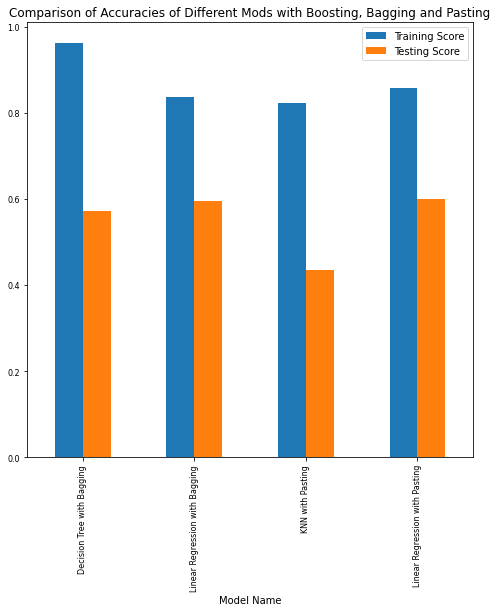

In [57]:
import matplotlib.pyplot as plt

ax = report_table[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Mods with Boosting, Bagging and Pasting", figsize=(8, 8), fontsize = 8)
plt.show()

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [59]:
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  6
